# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pyma = pd.merge(mouse_metadata,study_results,on="Mouse ID")

# Display the data table for preview
pyma.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
pd.DataFrame({"Total Subjects":[len(pyma["Mouse ID"].unique())]})

,Total Subjects
0,249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
pyma_dupes = pyma[pyma.duplicated(["Mouse ID","Timepoint"])]
pyma_dupes = pd.DataFrame({"Mouse ID":pyma_dupes["Mouse ID"].unique()})
pyma_dupes

,Mouse ID
0,g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_index = pyma[pyma["Mouse ID"]==str(pyma_dupes.iloc[0,0])].index
pyma_clean = pyma.drop(drop_index)
pyma_clean.reset_index(inplace=True)

In [6]:
# Checking the number of mice in the clean DataFrame.
pd.DataFrame({"Total Subjects":[len(pyma_clean["Mouse ID"].unique())]})

,Total Subjects
0,248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_regimen = pyma_clean.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].mean()
med_regimen = pyma_clean.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].median()
var_regimen = pyma_clean.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].var()
stdev_regimen = pyma_clean.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].std()
sem_regimen = pyma_clean.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].sem()
regimen_summ = pd.merge(mean_regimen,med_regimen,on="Drug Regimen")
regimen_summ = pd.merge(regimen_summ,var_regimen,on="Drug Regimen")
regimen_summ.rename(columns={
    "Tumor Volume (mm3)_x":"Mean Tumor Vol",
    "Tumor Volume (mm3)_y":"Median of Tumor Vol"
},inplace=True)
regimen_summ = pd.merge(regimen_summ,stdev_regimen,on="Drug Regimen")
regimen_summ = pd.merge(regimen_summ,sem_regimen,on="Drug Regimen")
regimen_summ.rename(columns={
    "Tumor Volume (mm3)_x":"Var of Tumor Vol",
    "Tumor Volume (mm3)_y":"Std of Tumor Vol",
    "Tumor Volume (mm3)":"SEM of Tumor Vol"
},inplace=True)
regimen_summ
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Vol,Median of Tumor Vol,Var of Tumor Vol,Std of Tumor Vol,SEM of Tumor Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = pyma_clean.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

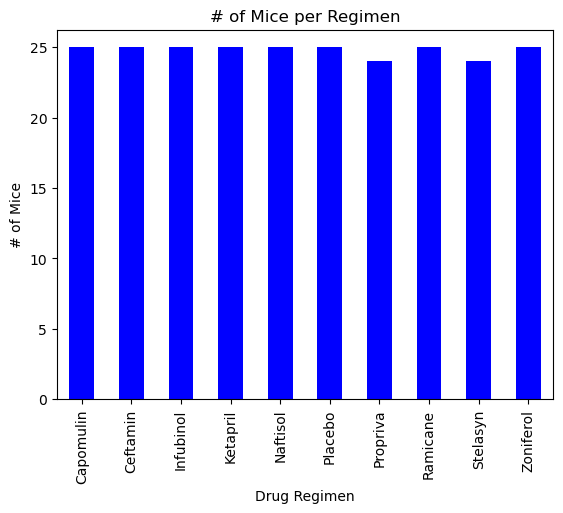

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count_chart = mice_count.plot(kind="bar", title="# of Mice per Regimen",legend=False,color="blue")
mice_count_chart.set_ylabel("# of Mice")
plt.show()

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(drug_count))
tick_loc = [value for value in x_axis]
plt.figure(figsize=(7,4))
plt.bar(x_axis, drug_count["Drug Regimen"], color='g', alpha=1, align="center", width=0.5)
plt.xticks(tick_loc, list(drug_count.index), rotation='vertical')
plt.xlim(-0.5, len(x_axis)-0.5)
plt.ylim(0, max(drug_count["Drug Regimen"])+10)
plt.title("Total # of Measurements for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Measurements")
drug_reg = ["Drug Regimen"]
plt.legend(drug_reg, loc="best")
plt.tight_layout()
plt.show()

NameError: name 'np' is not defined

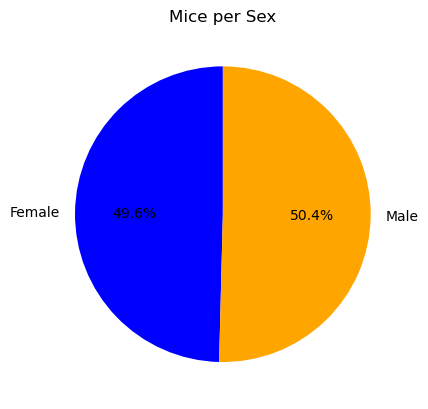

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = pyma_clean.groupby("Sex")[["Mouse ID"]].nunique()
mice_sex_chart = mice_sex["Mouse ID"].plot(
    kind="pie",label="", title="Mice per Sex", labels=mice_sex.index, autopct='%1.1f%%',legend=False,startangle=90,colors=["blue","orange"])

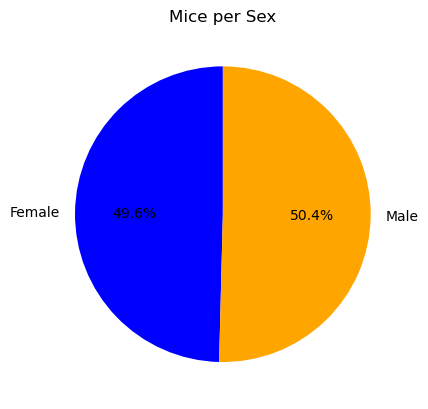

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig1, ax1 = plt.subplots()
ax1.pie(mice_sex["Mouse ID"], labels=mice_sex.index, autopct='%1.1f%%',startangle=90,colors=["blue","orange"])
plt.title("Mice per Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_ids = list(pyma_clean["Mouse ID"].unique())
max_times = []
for mouse in mouse_ids:
    maxidx = pyma_clean.loc[pyma_clean["Mouse ID"]==mouse,:]
    max_times.append(maxidx["Timepoint"].idxmax())
max_times = list(pyma_clean.iloc[i,[1,2,7]] for i in max_times)
max_times = pd.DataFrame(data=max_times)
max_times.rename(columns={
    "Tumor Volume (mm3)":"Final Tumor Vol"
},inplace=True)
max_times

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Final Tumor Vol
9,k403,Ramicane,22.050126
19,s185,Capomulin,23.343598
29,x401,Capomulin,28.484033
39,m601,Capomulin,28.430964
49,g791,Ramicane,29.128472
...,...,...,...
1846,z314,Stelasyn,45.934712
1849,z435,Propriva,48.710661
1859,z581,Infubinol,62.754451
1869,z795,Naftisol,65.741070


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
regimenz = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimenz:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    max_drug = max_times.loc[max_times["Drug Regimen"]==drug,:]
    quartiles = max_drug["Final Tumor Vol"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"The lower quartile of Final Tumor Vol for {drug} is: {lowerq}")
    print(f"The upper quartile of Final Tumor Vol for {drug} is: {upperq}")
    print(f"The interquartile range of Final Tumor Vol for {drug} is: {iqr}")
    print(f"The the median of Final Tumor Vol for {drug} is: {quartiles[0.5]} ")
    print(f"\nValues below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    # Determine outliers using upper and lower bounds
    outlier_vol = max_drug.loc[(max_drug['Final Tumor Vol'] < 
        lower_bound) | (max_drug['Final Tumor Vol'] > upper_bound)]
    if len(outlier_vol) == 0:
        print(f"\n{drug} has no potential outliers\n")
        print("-------------------------------------")
    else:
        print(f"\nPotential outliers for {drug}")
        print(outlier_vol.to_string(index=False))
        print("-------------------------------------")
    # add subset 
    max_drug = max_drug.loc[:,"Final Tumor Vol"]
    final_vol.append(max_drug)

The lower quartile of Final Tumor Vol for Capomulin is: 32.37735684
The upper quartile of Final Tumor Vol for Capomulin is: 40.1592203
The interquartile range of Final Tumor Vol for Capomulin is: 7.781863460000004
The the median of Final Tumor Vol for Capomulin is: 38.1251644 

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Capomulin has no potential outliers

-------------------------------------
The lower quartile of Final Tumor Vol for Ramicane is: 31.56046955
The upper quartile of Final Tumor Vol for Ramicane is: 40.65900627
The interquartile range of Final Tumor Vol for Ramicane is: 9.098536719999998
The the median of Final Tumor Vol for Ramicane is: 36.56165229 

Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Ramicane has no potential outliers

-------------------------------------
The lower quartile of Final Tumor Vol for Infubinol is: 54.04860769
The upper quartile of Final Tumor Vo

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

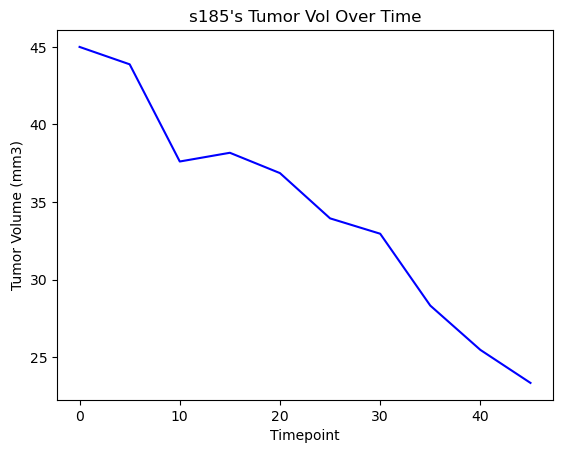

In [27]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = pyma_clean.loc[pyma_clean["Mouse ID"]==pyma_clean.loc[pyma_clean["Drug Regimen"]=="Capomulin",:].iloc[0][1],:]
capo_vol = list(capomulin_mouse["Tumor Volume (mm3)"])
fig2, ax2 = plt.subplots()
ax2.set_title(f"{capomulin_mouse.iloc[0][1]}'s Tumor Vol Over Time")
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.set_xlabel('Timepoint')
ax2.plot(capomulin_mouse["Timepoint"],capomulin_mouse["Tumor Volume (mm3)"],color="blue")
plt.show()

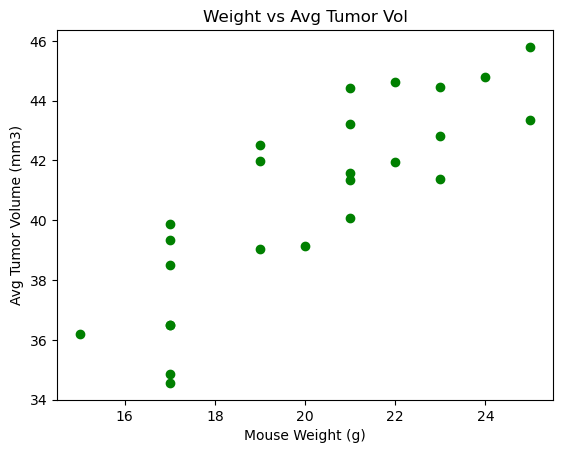

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo_regime = pyma_clean.loc[pyma_clean["Drug Regimen"]=="Capomulin",:].groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
plt.scatter(capo_regime["Weight (g)"],capo_regime["Tumor Volume (mm3)"],color="g")
plt.title("Weight vs Avg Tumor Vol")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

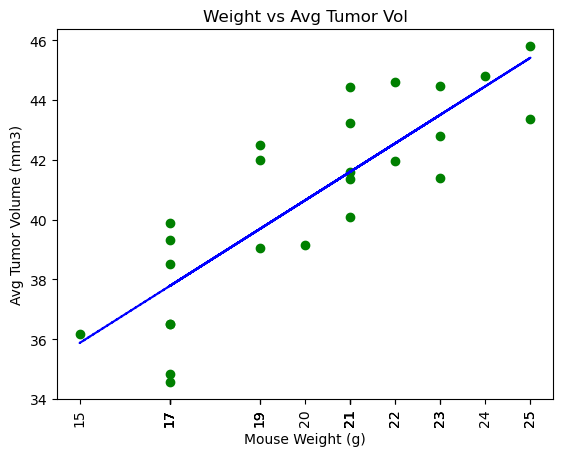

In [29]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capo_slope, capo_int, capo_r, capo_p, capo_std_err = st.linregress(capo_regime["Weight (g)"],capo_regime["Tumor Volume (mm3)"])
capo_fit = capo_slope * capo_regime["Weight (g)"] + capo_int
plt.scatter(capo_regime["Weight (g)"],capo_regime["Tumor Volume (mm3)"],color="g")
plt.plot(capo_regime["Weight (g)"],capo_fit,"--",color="b")
plt.xticks(capo_regime["Weight (g)"], rotation=90)
plt.title("Weight vs Avg Tumor Vol")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()